<a href="https://colab.research.google.com/github/vinodnbhat/AIML-CEP-2021-Assignments/blob/main/decision_tree_iris_dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn import tree

np.random.seed(1000)
iris = load_iris()
print('iris data shape: ', iris.data.shape)
A = iris.data
print('iris target shape: ', iris.target.shape)
print('Features of the first 5 samples of iris data:')
print(A[:5, ])

iris data shape:  (150, 4)
iris target shape:  (150,)
Features of the first 5 samples of iris data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [34]:
print('unique classes: ', np.unique(iris.target))
n = iris.data.shape[0]
d = iris.data.shape[1]

unique classes:  [0 1 2]


In [35]:
#In the following code, we create a nx1 vector of target labels
y = 1.0 * np.ones([A.shape[0], 1])
for i in range(iris.target.shape[0]):
  if iris.target[i] == 1:
    y[i] = 1
  else:
    y[i] = -1


In [36]:
# Create an index array
indexarr = np.arange(n)
np.random.shuffle(indexarr)
print('Shuffled indices of samples: ')
print(indexarr)

Shuffled indices of samples: 
[ 95  34 127 120  24  28  84  68  38 123 132  74  44   4 144  67 119  82
  37  49  81  70 125 141  57  15  85  97  60 137  23  62 143  64  39 108
 111  66 101 102 126 148 115  91 121 106 142 112  76   3  33   8  98 122
 138  83 131 147  93  78  96  22 103  99 124 140  80  86   9 136  19  63
  13  73  90  48 117  25  65  20  56 104  53  51  35  10   6  41 133  77
   2 110  72 134  55   5  12 107  29  54 130  17  79 118  47  27  46 129
 145  18 109 135  31   0  59 113  43 139 149 116  16   7 100  26  21  50
  52  32  75  11  69  61  14 114  88  30  58  42  36 146 105  40  45  89
 128   1  92  94  71  87]


In [37]:
num_train = int(0.8 * n)
num_test = n - num_train
print('num_train: ', num_train, 'num_test: ', num_test)

num_train:  120 num_test:  30


In [38]:
# Use the first 80% of indexarr to create the train data features and train labels
train_features = A[indexarr[0 : num_train]]
train_label = y[indexarr[0 : num_train]]
print('Shape of train data features: ', train_features.shape)
print('Shape of train data labels: ', train_label.shape)

Shape of train data features:  (120, 4)
Shape of train data labels:  (120, 1)


In [39]:
# Use remaining 20% of indexarr to create the test data and test labels
test_features = A[indexarr[num_train : n]]
test_label = y[indexarr[num_train : n]]
print('Shape of test data features: ', test_features.shape)
print('Shape of test data labels: ', test_label.shape)

Shape of test data features:  (30, 4)
Shape of test data labels:  (30, 1)


In [40]:
# create a decision tree classifier with 'entropy' as criterion
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

[Text(167.4, 199.32, 'X[3] <= 0.8\nentropy = 0.901\nsamples = 120\nvalue = [82, 38]'),
 Text(141.64615384615385, 163.07999999999998, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nentropy = 0.995\nsamples = 83\nvalue = [45, 38]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.527\nsamples = 42\nvalue = [5, 37]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nentropy = 0.183\nsamples = 36\nvalue = [1, 35]'),
 Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(77.26153846153846, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(154.52307

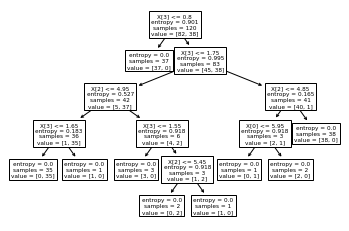

In [41]:
# train using decision tree classifier and plot the resultant decision tree
tree.plot_tree(clf.fit(train_features, train_label))

In [42]:
# Get the trained model in clf_model
clf_model = clf.fit(train_features, train_label)

# We will now use the trained model for predition on the test data set
predicted_labels = clf_model.predict(test_features)
#print(predicted_labels)

In [43]:
# reshaping predicted_labels so that it is of the same shape as test_label
predicted_labels = np.reshape(predicted_labels.data, (num_test, 1))
#print(predicted_labels)
#print(test_label)

In [44]:
# compute test set error and test set accuracy
test_error = np.sum(0.5 * np.abs(predicted_labels - test_label)) / len(test_label) * 100.0
print('test_error: ', test_error)
test_accuracy = 100.0 - test_error
print('test set accuracy: ', test_accuracy)

test_error:  0.0
test set accuracy:  100.0


In [45]:
# We can also use the trained model clf_model to predict the train set
predicted_train_labels = clf_model.predict(train_features)
predicted_train_labels = np.reshape(predicted_train_labels, (num_train, 1))
train_error = np.sum(0.5 * np.abs(predicted_train_labels - train_label)) / len(train_label) * 100.0
train_accuracy = 100.0 - train_error
print('train set accuracy: ', train_accuracy)

train set accuracy:  100.0
